### 데이터 만들기
- district : 행정 구역(서초구, 송파구 등, 서울의 단위 지역 분류)
- dong : 구(district)보다 작은 행정구역(대치동, 도곡동 등)
- latitude : 위도
- longitude : 경도
- label : 한강 기준으로 동, 서, 남, 북으로 구분한 지역 명칭(강동, 강서, 강남, 강북)

데이터는 csv로 만들어서 불러오겠음.

In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv('../algorithm/decision_tree_data1.csv')

In [4]:
train.tail()

,district,latitude,longitude,label
15,Seongdong-gu,37.557340,127.041667,Gangdong
16,Dongdaemun-gu,37.575759,127.025288,Gangdong
17,Gwangjin-gu,37.557562,127.083467,Gangdong
18,Gangdong-gu,37.554194,127.151405,Gangdong
19,Jungrang-gu,37.593684,127.090384,Gangdong


In [5]:
test = pd.read_csv('../algorithm/decision_tree_data2.csv')

In [6]:
test.tail()

,dong,latitude,longitude,label
15,Hwayang-dong,37.544234,127.071648,Gangdong
16,Gui-dong,37.543757,127.086803,Gangdong
17,Neung-dong,37.553102,127.080248,Gangdong
18,Amsa-dong,37.552370,127.127124,Gangdong
19,Chunho-dong,37.547436,127.137382,Gangdong


In [7]:
train.label.value_counts()

Gangbuk     5
Gangnam     5
Gangseo     5
Gangdong    5
Name: label, dtype: int64

In [8]:
test.label.value_counts()

Gangbuk     5
Gangnam     5
Gangseo     5
Gangdong    5
Name: label, dtype: int64

### 데이터 시각화

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'district visualization in 2d plane')

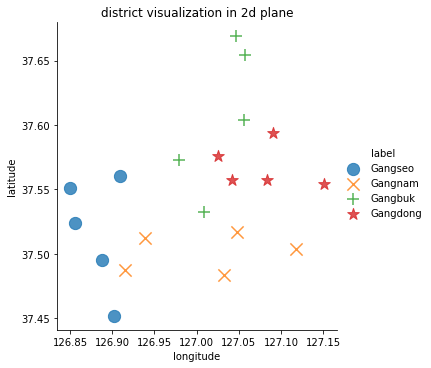

In [10]:
sns.lmplot('longitude', 'latitude', data=train, fit_reg=False, 
           scatter_kws = {'s' : 150}, 
           markers = ["o", "x", "+", "*"],
           hue ='label')
# title
plt.title('district visualization in 2d plane')

### 데이터 다듬기

In [11]:
train.drop(['district'], axis=1, inplace=True)
test.drop(['dong'], axis=1, inplace=True)

In [12]:
x_train = train[['longitude', 'latitude']]
y_train = train[['label']]

x_test = test[['longitude', 'latitude']]
y_test = test[['label']]

### 모델학습
- 사이킷런의 의사결정 트리 (sklearn_dicision_tree)

In [13]:
from sklearn import tree
from sklearn import preprocessing

In [14]:
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)
clf = tree.DecisionTreeClassifier(random_state=35).fit(x_train, y_encoded)

C:\Users\JAY\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [15]:
def display_decision_surface(clf, x, y):
    x_min = x.longitude.min() - 0.01
    x_max = x.longitude.max() + 0.01
    y_min = x.latitude.min() - 0.01
    y_max = x.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = 'rywb'
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                          np.arange(y_min, y_max, plot_step))
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors) :
        idx = np.where(y == i)
        plt.scatter(x.loc[idx].longitude, x.loc[idx].latitude,
                   c = color, label=le.classes_[i],
                   cmap=plt.cm.RdYlBu, edgecolor='black', s=200)
    
    plt.title('Decision surface of a decision tree', fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc =2, borderaxespad=0, fontsize=14)
    plt.xlabel('longitude', fontsize=16)
    plt.ylabel('latitude', fontsize=16)
    plt.rcParams['figure.figsize'] = [7,5]
    plt.rcParams['font.size'] = 14
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.show()
    

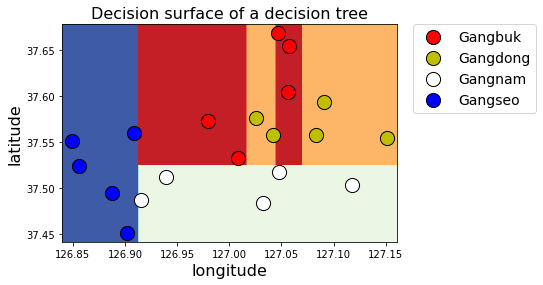

In [16]:
display_decision_surface(clf, x_train, y_encoded) # overfiting을 보여줌

### 과대적합 피하기

- max_depth : 트리의 최대 한도 깊이
- min_samples_split : 자식 노드를 갖기 위한 최소한의 데이터 개수
- min_samples_leaf : 리프 노드의 최소 데이터 개수
- randomm_state : 동일한 정수를 입력했을 때 학습 결과를 항상 같게 만들어주는 파라미터

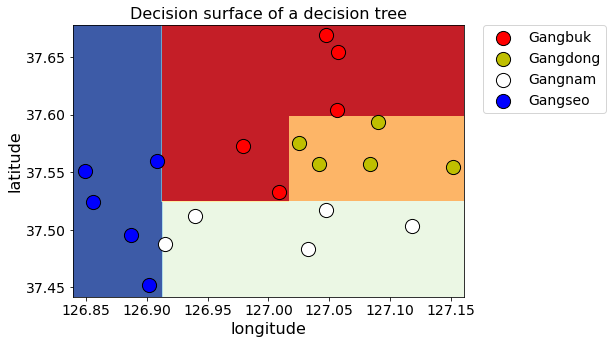

In [17]:
clf = tree.DecisionTreeClassifier(max_depth=4,
                                  min_samples_split=2,
                                  min_samples_leaf=2,
                                  random_state=70).fit(x_train, y_encoded.ravel())
display_decision_surface(clf, x_train, y_encoded)

### 의사결정 트리 시각화
- 장점 : 예측이 이뤄진 과정을 쉽게 시각화해서 데이터 분석가들이 특별한 수학적 지식이 없어도 이해하기 쉽다

In [1]:
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None)
# graph = graphviz.Source(dot_data)
# graph.render('seoul')
# dot_data = tree.export_graphviz(clf, out_file=None,
#                                 feature_names=['longitude', 'latitude'],
#                                 class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],
#                                 filled=True, 
#                                 rounded=True,
#                                 special_characters=True)

# graph = graphviz.Source(dot_data)
# graph